In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os
import PIL 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [8]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [9]:
data_dir

'.\\datasets\\flower_photos'

In [10]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [11]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [12]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

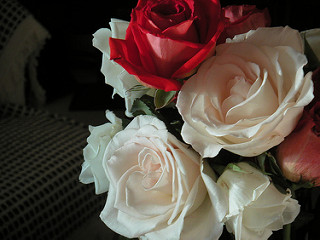

In [14]:
PIL.Image.open(str(roses[1]))

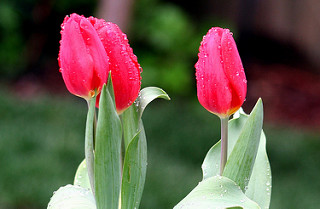

In [15]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [20]:
flowers_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [21]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}


In [23]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [28]:
img=cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [29]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
X,y=[],[]

for flower_name,images in flowers_image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [35]:
X=np.array(X)
y=np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [38]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 
    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.3465 - loss: 1.5061
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.6053 - loss: 0.9887
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.7393 - loss: 0.7502
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.8061 - loss: 0.5663
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.8828 - loss: 0.3387
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9335 - loss: 0.2071
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9583 - loss: 0.1424
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9771 - loss: 0.0731
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9934 - loss: 0.0358
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9888 - loss: 0.0395
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9869 - loss: 0.0487
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15

In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6655 - loss: 2.4187


[2.5242130756378174, 0.6601307392120361]

In [40]:
predictions= model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


array([[  8.516833  ,  19.743626  ,  -0.2699802 , -24.944256  ,
        -11.133852  ],
       [  9.821292  ,   0.6520474 , -10.039272  ,  -2.8704345 ,
          7.2172513 ],
       [ -7.177532  ,   2.0459409 ,  16.624586  , -12.214939  ,
         -9.018109  ],
       ...,
       [ -2.0831788 ,  -6.463443  ,  -9.057831  ,   8.32063   ,
         -0.71667564],
       [  6.2750735 ,   4.4748397 ,   4.356242  , -11.529854  ,
         -2.3889294 ],
       [  0.51731294, -14.390054  ,  -1.7096231 ,   7.0657873 ,
          7.6048965 ]], dtype=float32)

In [41]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.3312519e-05, 9.9998665e-01, 2.0332742e-09, 3.9110550e-20,
       3.8911335e-14], dtype=float32)>

In [42]:
np.argmax(score)

1

In [43]:
y_test[0]

1

In [47]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'